
**Importing Libraries **

In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re
iphone_reviews=[]

**Extracting reviews from snapdeal website**

In [2]:
########### Extracting reviews from snapdeal website ##############

iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews


In [3]:
### Removing repeated reviews
iphone_snapdeal = list(set(iphone_snapdeal))
# Writing reviews into text file
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [4]:
iphone_snapdeal

['Satisfied and will buy more products from Snapdeal',
 "It's really 100% worth to buy this product. I am fully satisfied with this product.",
 'A mush have deal',
 'it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.',
 'lovely  fastest super',
 'Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\nPros\n1. Very Cheap prize\n2. IOS 9 upgrade.\n3. Very smooth\n4. Good build quality\n\nCons\n1.Plastic body\n2. 8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K',
 'Bought this for my dear wife as a surprise. Got delivered on time!',
 'Features are good....but the phone gets heated after some time'

**Import Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

**load the dataset**

In [6]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['Satisfied and will buy more products from Snapdeal',"""It's really 100% worth to buy this product. I am fully satisfied with this product.""",'A mush have deal','it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.','lovely fastest super','Recently purchase the phone and was a bit doubtfull while purchasing,but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\nPros\n1. Very Cheap prize\n2. IOS 9 upgrade.\n3. Very smooth\n4. Good build quality\n\nCons\n1.Plastic body\n2. 8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K','Bought this for my dear wife as a surprise. Got delivered on time!','Features are good....but the phone gets heated after some time','Excellent product. Can be recommended to my friends and family members.',...,"leaving only 3 GB for your files. Unless you're not a heavy files user.""",'Good product and packing was also good only issue with courier service..they took more then 10 days to deliver .','Very good product and delivered in time as committed; true value for money','Service quality is very good and level of interactions have been good.','Genuine product quality great.. Overall perfect','Good buy at an affordable price during the sale.','Worth buying from snap deal due to its competitive price and good service\nThanks sd for the phone at this price','This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also','Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera,crisp display . The battery issue has been solved with the latest ios9 update .']


**Text processing**

In [7]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'Satisfied and will buy more products from Snapdeal\'  "It\'s really 100% worth to buy this product. I am fully satisfied with this product."  \'A mush have deal\'  \'it is simple \\nall the thing that u need it having it \\nI have buy it 2 year before from snapdeal and still it is in perfect condition.\\nno lagging till today\\nsuitable for your business need.\'  \'lovely  fastest super\'  \'Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\\nPros\\n1. Very Cheap prize\\n2. IOS 9 upgrade.\\n3. Very smooth\\n4. Good build quality\\n\\nCons\\n1.Plastic body\\n2. 8GB memory\\n\\nBut even plastic body looks attractive with premium and good plastuc used. Everyone should go with this phone if you have a budget of 20K\'  \'Bought this for my dear wife as a surprise. Got delivered on time!\'  \'Features are good....but the phone gets 

In [8]:
# Remove Punctuations
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Satisfied and will buy more products from Snapdeal  Its really 100 worth to buy this product I am fully satisfied with this product  A mush have deal  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for your business need  lovely  fastest super  Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price It was packed beatifully by the seller and same day dispatchnProsn1 Very Cheap prizen2 IOS 9 upgraden3 Very smoothn4 Good build qualitynnConsn1Plastic bodyn2 8GB memorynnBut even plastic body looks attractive with premium and good plastuc used Everyone should go with this phone if you have a budget of 20K  Bought this for my dear wife as a surprise Got delivered on time  Features are goodbut the phone gets heated after some time  Excellent product Can be recommended to my friends and fam

In [9]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Satisfied and will buy more products from Snapdeal  Its really 100 worth to buy this product I am fully satisfied with this product  A mush have deal  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for your business need  lovely  fastest super  Recently purchase the phone and was a bit doubtfull while purchasing  but i must tell you this is the most best iphone you can get at this price It was packed beatifully by the seller and same day dispatchnProsn1 Very Cheap prizen2 IOS 9 upgraden3 Very smoothn4 Good build qualitynnConsn1Plastic bodyn2 8GB memorynnBut even plastic body looks attractive with premium and good plastuc used Everyone should go with this phone if you have a budget of 20K  Bought this for my dear wife as a surprise Got delivered on time  Features are goodbut the phone gets heated after some time  Excellent product Can be recommended to my friends and fam

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Satisfied', 'and', 'will', 'buy', 'more', 'products', 'from', 'Snapdeal', 'Its', 'really', '100', 'worth', 'to', 'buy', 'this', 'product', 'I', 'am', 'fully', 'satisfied', 'with', 'this', 'product', 'A', 'mush', 'have', 'deal', 'it', 'is', 'simple', 'nall', 'the', 'thing', 'that', 'u', 'need', 'it', 'having', 'it', 'nI', 'have', 'buy', 'it', '2', 'year', 'before', 'from', 'snapdeal', 'and', 'still', 'it', 'is', 'in', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'for', 'your', 'business', 'need', 'lovely', 'fastest', 'super', 'Recently', 'purchase', 'the', 'phone', 'and', 'was', 'a', 'bit', 'doubtfull', 'while', 'purchasing', 'but', 'i', 'must', 'tell', 'you', 'this', 'is', 'the', 'most', 'best', 'iphone', 'you', 'can', 'get', 'at', 'this', 'price', 'It', 'was', 'packed', 'beatifully', 'by', 'the', 'seller', 'and', 'same', 'day', 'dispatchnProsn1', 'Very', 'Cheap', 'prizen2', 'IOS', '9', 'upgraden3', 'Very', 'smoothn4', 'Good', 'build', 'qualitynnConsn1Plastic', 'bo

In [12]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Tokens count
len(text_tokens)

1573

In [14]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Satisfied', 'buy', 'products', 'Snapdeal', 'Its', 'really', '100', 'worth', 'buy', 'product', 'fully', 'satisfied', 'product', 'A', 'mush', 'deal', 'simple', 'nall', 'thing', 'u', 'need', 'nI', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'lovely', 'fastest', 'super', 'Recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'best', 'iphone', 'get', 'price', 'It', 'packed', 'beatifully', 'seller', 'day', 'dispatchnProsn1', 'Very', 'Cheap', 'prizen2', 'IOS', '9', 'upgraden3', 'Very', 'smoothn4', 'Good', 'build', 'qualitynnConsn1Plastic', 'bodyn2', '8GB', 'memorynnBut', 'even', 'plastic', 'body', 'looks', 'attractive', 'premium', 'good', 'plastuc', 'used', 'Everyone', 'go', 'phone', 'budget', '20K', 'Bought', 'dear', 'wife', 'surprise', 'Got', 'delivered', 'time', 'Features', 'goodbut', 'phone', 'gets', 'heated', 'time', 'Excellent', 'product', 'Can', 'recommended', 'friends', 'fami

In [15]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['friends', 'family', 'members', 'superb', 'model', 'snapdeal', 'delivered', 'promised', 'time', 'honestly', 'speaking', 'initially', 'hesitated', 'previous', 'reviews', 'snapdeal', 'but', 'reviews', 'fake', 'damage', 'reputation', 'snapdeal', 'truely', 'satisfied', 'snapdeals', 'service', '100', 'satisfactory', 'genuine', 'product', 'honest', 'service', 'so', 'dont', 'believe', 'rumours', 'going', 'five', 'stars', 'thanks', 'snapdeal', 'wonderful', 'shopping', 'experience', 'awesome', 'mobile', 'working', 'smooth', 'like', 'apple', 'iphone', 'hahahaha', 'cool', 'its', 'cool', 'phone', 'good', 'processing', 'latest', 'ios', 'the', 'cons', 'low', 'memory', 'space', 'there', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'already', 'filled', 'u', 'xa0read', 'it', 'nice', 'phone', 'apple', 'camera', 'good', 'phone', 'works', 'perfectly', 'it', 'worth', 'shot', 'goood', 'fast', 'shipping', 'best', 'phone', 'iphone', 'they', 'sold', 'iphone', 'interest', 'free']


In [16]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['friend', 'famili', 'member', 'superb', 'model', 'snapdeal', 'deliv', 'promis', 'time', 'honestli', 'speak', 'initi', 'hesit', 'previou', 'review', 'snapdeal', 'but', 'review', 'fake', 'damag', 'reput', 'snapdeal', 'trueli', 'satisfi', 'snapdeal', 'servic', '100', 'satisfactori', 'genuin', 'product', 'honest', 'servic', 'so', 'dont', 'believ', 'rumour', 'go', 'five', 'star', 'thank', 'snapdeal', 'wonder', 'shop', 'experi', 'awesom', 'mobil', 'work', 'smooth', 'like', 'appl', 'iphon', 'hahahaha', 'cool', 'it', 'cool', 'phone', 'good', 'process', 'latest', 'io', 'the', 'con', 'low', 'memori', 'space', 'there', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'alreadi', 'fill', 'u', 'xa0read', 'it', 'nice', 'phone', 'appl', 'camera', 'good', 'phone', 'work', 'perfectli', 'it', 'worth', 'shot', 'goood', 'fast', 'ship', 'best', 'phone', 'iphon', 'they', 'sold', 'iphon', 'interest', 'free']


In [17]:
!pip3 install en_core_web_sm
!python -m spacy download %

2023-11-28 10:51:00.208446: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 10:51:00.208517: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 10:51:00.208562: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 10:51:02.142834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

✘ No compatible package found for '%' (spaCy v3.6.1)



In [18]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

satisfied buy products snapdeal its really 100 worth buy product fully satisfied product a mush deal simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need lovely fastest super recently purchase phone bit doubtfull purchasing must tell best iphone get price it packed beatifully seller day dispatchnprosn1 very cheap prizen2 ios 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8gb memorynnbut even plastic body looks attractive premium good plastuc used everyone go phone budget 20k bought dear wife surprise got delivered time features goodbut phone gets heated time excellent product can recommended friends family members superb model snapdeal delivered promised time honestly speaking initially hesitated previous reviews snapdeal but reviews fake damage reputation snapdeal truely satisfied snapdeals service 100 satisfactory genuine product honest service so dont believe rumours going five stars thanks snapdeal 

In [19]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['satisfied', 'buy', 'product', 'snapdeal', 'its', 'really', '100', 'worth', 'buy', 'product', 'fully', 'satisfied', 'product', 'a', 'mush', 'deal', 'simple', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'lovely', 'fast', 'super', 'recently', 'purchase', 'phone', 'bit', 'doubtfull', 'purchasing', 'must', 'tell', 'good', 'iphone', 'get', 'price', 'it', 'pack', 'beatifully', 'seller', 'day', 'dispatchnprosn1', 'very', 'cheap', 'prizen2', 'io', '9', 'upgraden3', 'very', 'smoothn4', 'good', 'build', 'qualitynnconsn1plastic', 'bodyn2', '8', 'gb', 'memorynnbut', 'even', 'plastic', 'body', 'look', 'attractive', 'premium', 'good', 'plastuc', 'use', 'everyone', 'go', 'phone', 'budget', '20k', 'buy', 'dear', 'wife', 'surprise', 'got', 'deliver', 'time', 'feature', 'goodbut', 'phone', 'get', 'heated', 'time', 'excellent', 'product', 'can', 'recommend', 'friend', 'family', 'member', 

In [20]:
clean_comments=' '.join(lemmas)
clean_comments

'satisfied buy product snapdeal its really 100 worth buy product fully satisfied product a mush deal simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need lovely fast super recently purchase phone bit doubtfull purchasing must tell good iphone get price it pack beatifully seller day dispatchnprosn1 very cheap prizen2 io 9 upgraden3 very smoothn4 good build qualitynnconsn1plastic bodyn2 8 gb memorynnbut even plastic body look attractive premium good plastuc use everyone go phone budget 20k buy dear wife surprise got deliver time feature goodbut phone get heated time excellent product can recommend friend family member superb model snapdeal deliver promise time honestly speak initially hesitate previous review snapdeal but review fake damage reputation snapdeal truely satisfied snapdeal service 100 satisfactory genuine product honest service so do not believe rumour go five star thank snapdeal wonderful shopping experience aw

**Feature Extaction**

**1. Using CountVectorizer**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'satisfied': 301, 'buy': 54, 'product': 264, 'snapdeal': 333, 'its': 180, 'really': 286, '100': 1, 'worth': 406, 'fully': 137, 'mush': 211, 'deal': 91, 'simple': 324, 'nall': 213, 'thing': 360, 'need': 217, 'ni': 220, 'year': 409, 'still': 343, 'perfect': 241, 'conditionnno': 74, 'lagging': 184, 'till': 367, 'todaynsuitable': 371, 'business': 52, 'lovely': 194, 'fast': 124, 'super': 346, 'recently': 288, 'purchase': 274, 'phone': 245, 'bit': 43, 'doubtfull': 106, 'purchasing': 275, 'must': 212, 'tell': 353, 'good': 143, 'iphone': 173, 'get': 140, 'price': 256, 'it': 177, 'pack': 236, 'beatifully': 40, 'seller': 310, 'day': 89, 'dispatchnprosn1': 101, 'very': 391, 'cheap': 62, 'prizen2': 260, 'io': 170, 'upgraden3': 384, 'smoothn4': 331, 'build': 51, 'qualitynnconsn1plastic': 278, 'bodyn2': 46, 'gb': 138, 'memorynnbut': 204, 'even': 115, 'plastic': 250, 'body': 45, 'look': 192, 'attractive': 31, 'premium': 253, 'plastuc': 251, 'use': 386, 'everyone': 117, 'go': 142, 'budget': 50, '20k'

In [24]:
print(cv.get_feature_names_out()[100:200])

['discount' 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted' 'doubtfull'
 'dream' 'dt' 'due' 'earn' 'easy' 'eliveryi' 'emi' 'essy' 'even' 'ever'
 'everyone' 'everything' 'excellent' 'expectation' 'experience' 'fake'
 'family' 'fast' 'feature' 'feel' 'file' 'fill' 'find' 'finger' 'first'
 'five' 'flaw' 'fraudulent' 'free' 'friend' 'fully' 'gb' 'genuine' 'get'
 'gift' 'go' 'good' 'goodbut' 'goood' 'got' 'grand' 'great' 'guess'
 'hahahaha' 'hang' 'happy' 'happyalso' 'have' 'headphone' 'hear' 'heated'
 'heavy' 'hesitate' 'honest' 'honestly' 'hour' 'however' 'hv' 'in'
 'initially' 'inter' 'interaction' 'interest' 'io' 'ios' 'ios9' 'iphone'
 'iphone5c' 'iphoneearli' 'issue' 'it' 'item' 'itnniphone' 'its' 'job'
 'lack' 'lag' 'lagging' 'late' 'leave' 'level' 'like' 'limit'
 'listnnapple' 'little' 'look' 'love' 'lovely' 'low' 'make' 'manufacturer'
 'mark' 'marvallous']


In [25]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(clean_commentscv.toarray().shape)

(1028, 411)


**2. CountVectorizer with N-grams (Bigrams & Trigrams)**

In [28]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '5c' 'also' 'amazing' 'and' 'apple' 'awesome' 'awsme' 'be' 'body'
 'box' 'brand' 'budget' 'but' 'buy' 'camera' 'cheap' 'condition' 'day'
 'deal' 'deliver' 'delivery' 'do' 'even' 'excellent' 'experience' 'fast'
 'file' 'gb' 'genuine' 'get' 'go' 'good' 'got' 'great' 'hang' 'happy'
 'have' 'interest' 'io' 'ios' 'iphone' 'issue' 'it' 'its' 'late' 'like'
 'look' 'low' 'memory' 'mobile' 'need' 'new' 'nice' 'not' 'one' 'order'
 'original' 'pack' 'perfect' 'phone' 'plastic' 'price' 'problem' 'product'
 'quality' 'really' 'receive' 'recommend' 'review' 'satisfactory'
 'satisfied' 'scheme' 'seller' 'service' 'shipping' 'shop' 'site' 'snap'
 'snapdeal' 'so' 'space' 'superb' 'take' 'thank' 'the' 'thing' 'this'
 'though' 'till' 'time' 'true' 'update' 'use' 'very' 'want' 'within'
 'worth' 'would' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**3. TF-IDF Vectorizer**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['10' '100' '1000rs' '2030' '20k' '24' '2nd' '5c' '5cnnsnapdeal' '6s'
 '9nncons' 'absolutly' 'accessory' 'account' 'action' 'ad' 'adorable'
 'affordable' 'after' 'almost' 'already' 'also' 'always' 'amazing' 'and'
 'andriodblackberrywindow' 'android' 'app' 'apple' 'around' 'as'
 'attractive' 'available' 'awesome' 'awesum' 'awsme' 'awwsum' 'back'
 'battery' 'be' 'beatifully' 'beautiful' 'believe' 'bit' 'bluetooth'
 'body' 'bodyn2' 'box' 'brand' 'bt' 'budget' 'build' 'business' 'but'
 'buy' 'camera' 'can' 'capacity' 'care' 'category' 'cell' 'charge' 'cheap'
 'choice' 'choose' 'class' 'close' 'colour' 'come' 'commit' 'compare'
 'competitive' 'con' 'condition' 'conditionnno' 'consist' 'contact' 'cool'
 'costly' 'coupon' 'courier' 'cr' 'crazy' 'credit' 'crisp' 'customer'
 'damage' 'dat' 'data' 'day' 'daynand' 'deal' 'dear' 'decide' 'defination'
 'deliver' 'delivery' 'delivry' 'dere' 'dis' 'discount' 'dispatchnprosn1'
 'display' 'do' 'doubt' 'doubted' 'doubtfull' 'dream' 'dt' 'due' 'earn'
 'e

**Generate Word Cloud**

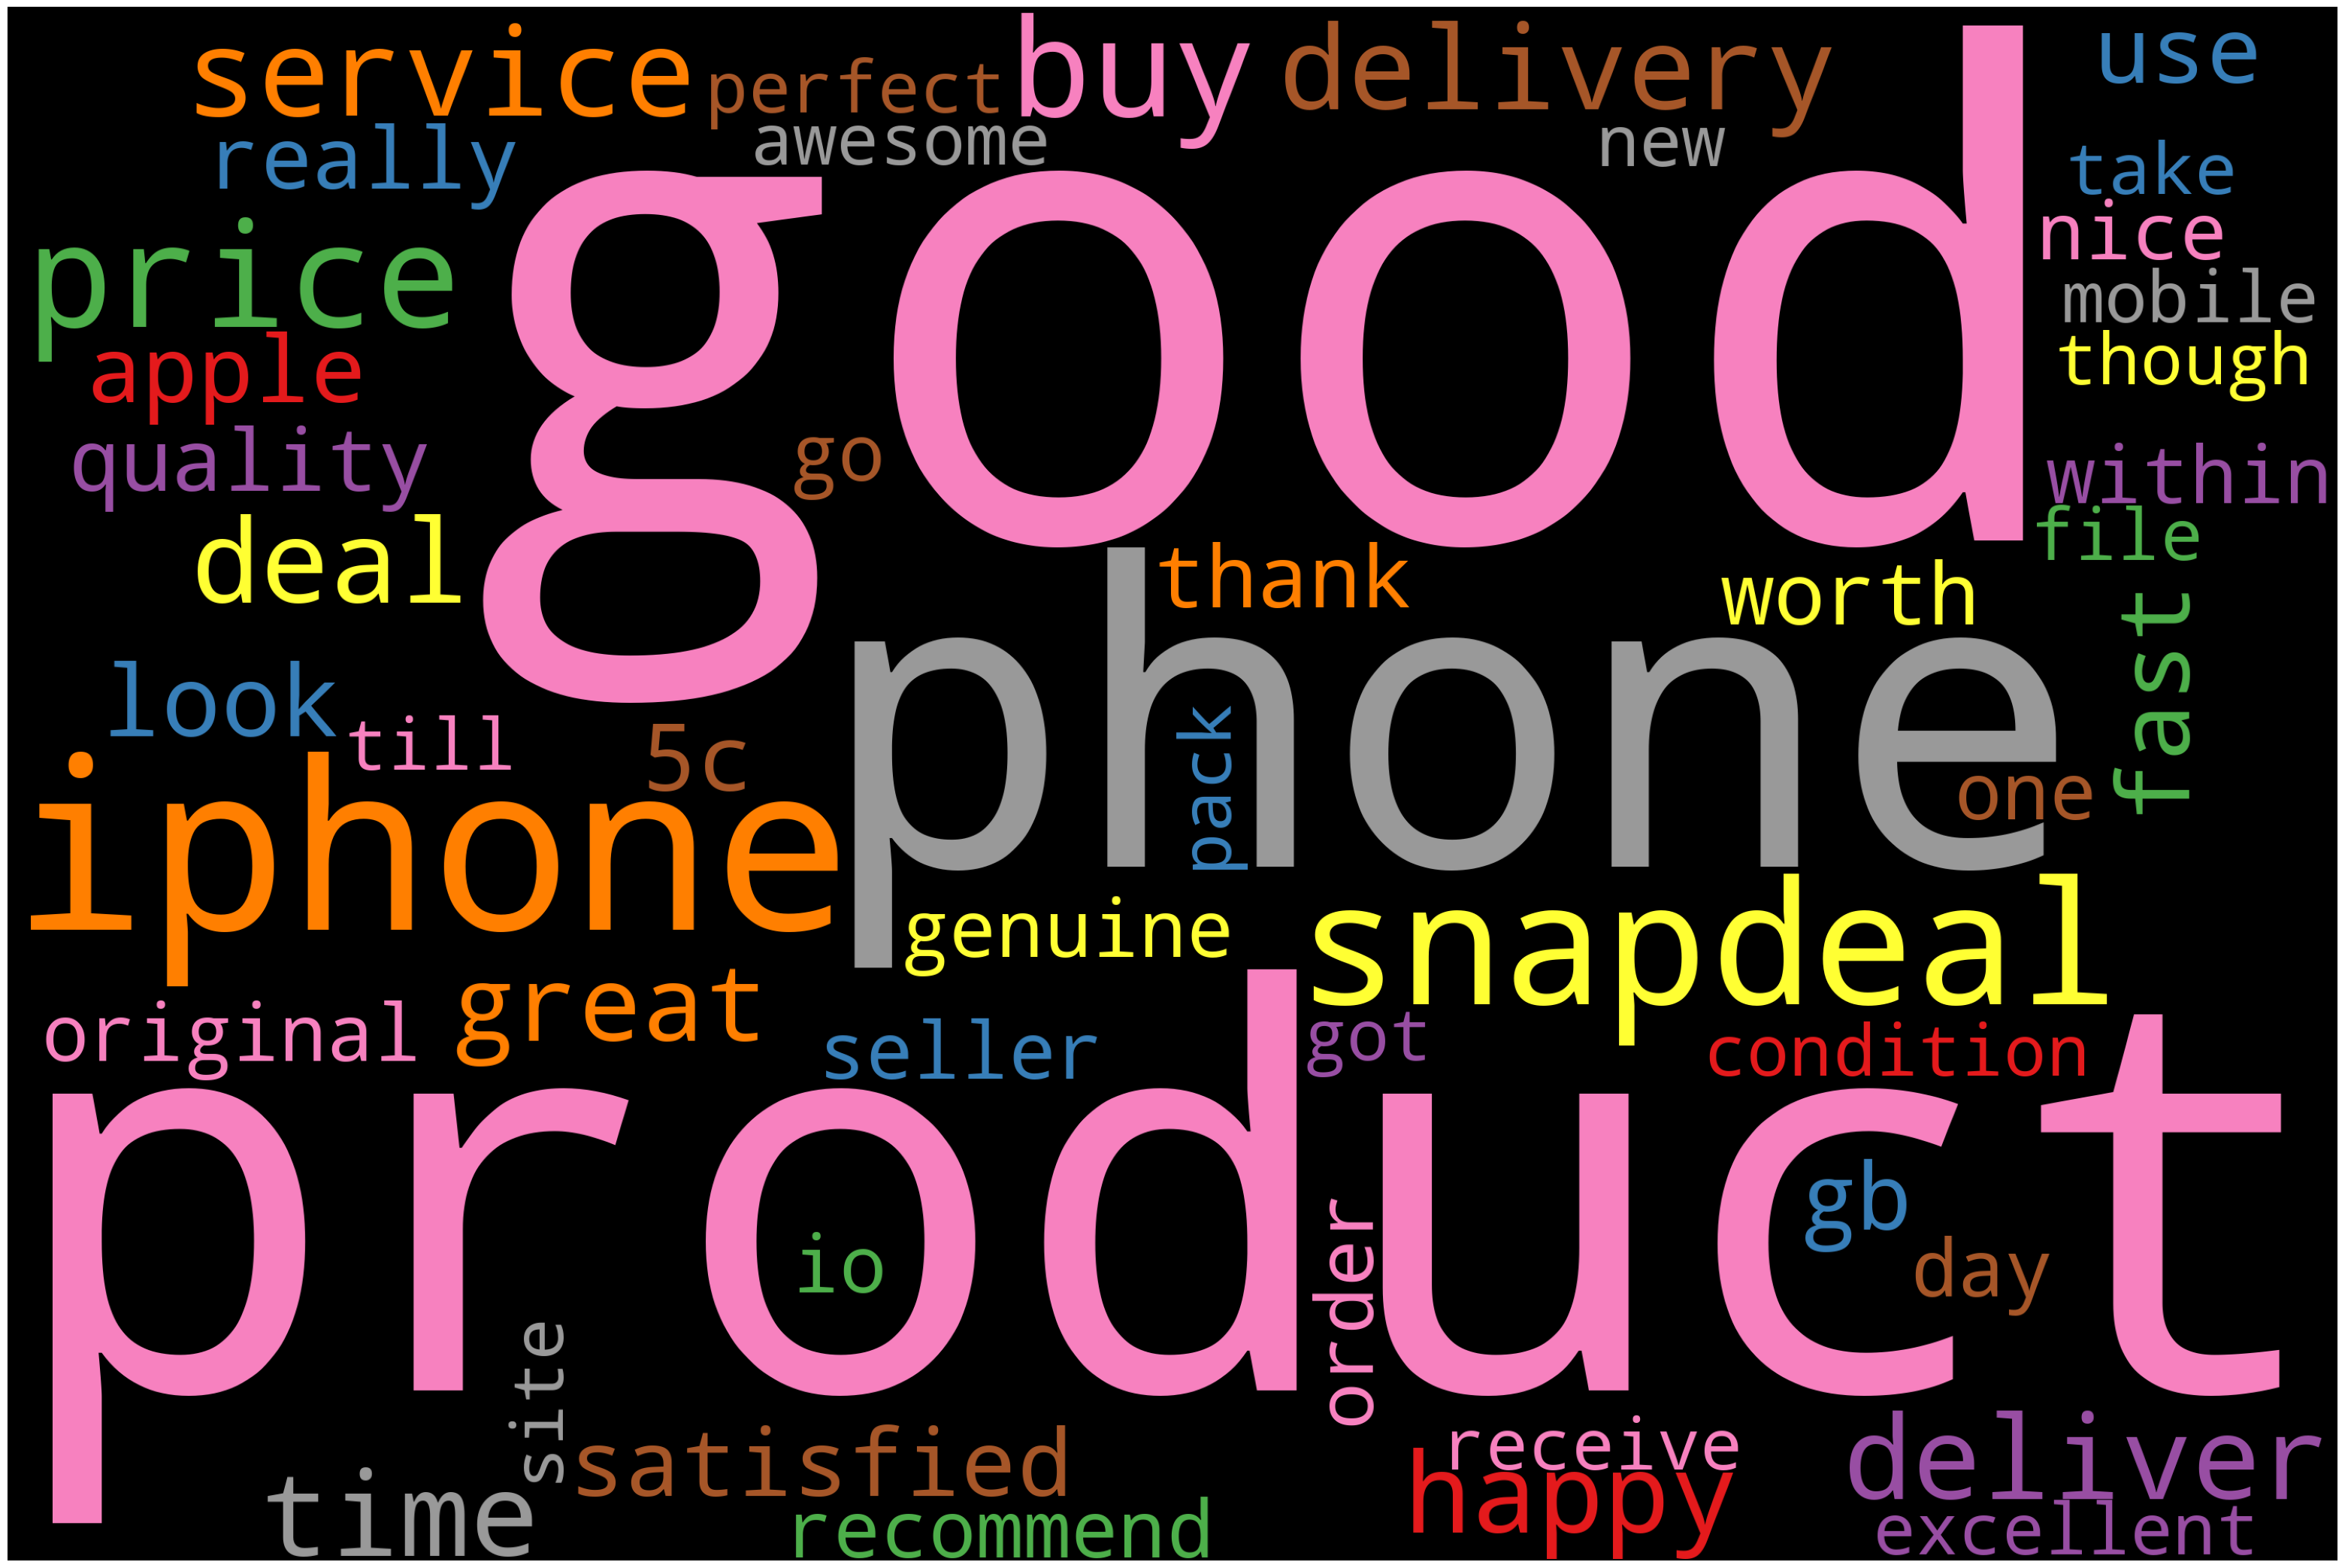

In [30]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

**Named Entity Recognition (NER)**

In [31]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [32]:
for token in doc_block[100:200]:
    print(token,token.pos_)

recommend VERB
friend NOUN
family NOUN
member NOUN
superb PROPN
model NOUN
snapdeal NOUN
deliver NOUN
promise NOUN
time NOUN
honestly ADV
speak VERB
initially ADV
hesitate VERB
previous ADJ
review NOUN
snapdeal ADJ
but CCONJ
review VERB
fake ADJ
damage NOUN
reputation NOUN
snapdeal ADV
truely ADV
satisfied ADJ
snapdeal ADJ
service NOUN
100 NUM
satisfactory ADJ
genuine ADJ
product NOUN
honest ADJ
service NOUN
so ADV
do AUX
not PART
believe VERB
rumour NOUN
go VERB
five NUM
star NOUN
thank VERB
snapdeal ADJ
wonderful ADJ
shopping NOUN
experience NOUN
awesome PROPN
mobile NOUN
working NOUN
smooth NOUN
like ADP
apple NOUN
iphone PROPN
hahahaha NOUN
cool VERB
its PRON
cool ADJ
phone NOUN
good ADJ
processing NOUN
late ADV
io ADP
the DET
con PROPN
low ADJ
memory NOUN
space NOUN
there ADV
total VERB
8 NUM
gb NOUN
space NOUN
almost ADV
6 NUM
gb NOUN
already ADV
fill VERB
u PRON
xa0read PUNCT
it PRON
nice ADJ
phone NOUN
apple NOUN
camera NOUN
good ADJ
phone NOUN
work NOUN
perfectly ADV
it PRON
w

In [33]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['goood', 'shipping', 'phone', 'iphone', 'sell', 'iphone', 'interest', 'scheme', 'phone', 'seller', 'price', 'interest', 'part', 'credit', 'account', 'snapdeal', 'take', 'action', 'issue', 'buy', 'scheme', 'mobile', 'got', 'hang', 'touch', 'perform', 'price', 'phone', 'one', 'recommend', 'phone', 'good', 'iphone', 'apple', 'service', 'product', 'price', 'seller', 'product', 'shipping', 'recommend', 'phone', 'good', 'd', 'phone', 'look', 'plastic', 'body', 'metal', 'body', 'look', 'mean', 'body', 'look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'space', 'say', 'phone', 'problem', 'choose', 'gb', 'phone', 'flaw', 'word', 'say', 'phone', 'dis', 'price', 'thumb', 'apple', 'product', 'thank', 'phoneever', 'buy', 'deliver', 'time', 'product', 'dream', 'come', 'satisfy', 'product', 'brand', 'iphone', 'get', 'hour', 'order', 'pack', 'superb', 'priority', 'snapdeal', 'product', 'quality', 'thing', 'memory']


In [34]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,40
1,phone,28
2,iphone,26
3,price,17
4,buy,15
5,service,12
6,deal,11
7,deliver,11
8,time,11
9,delivery,11


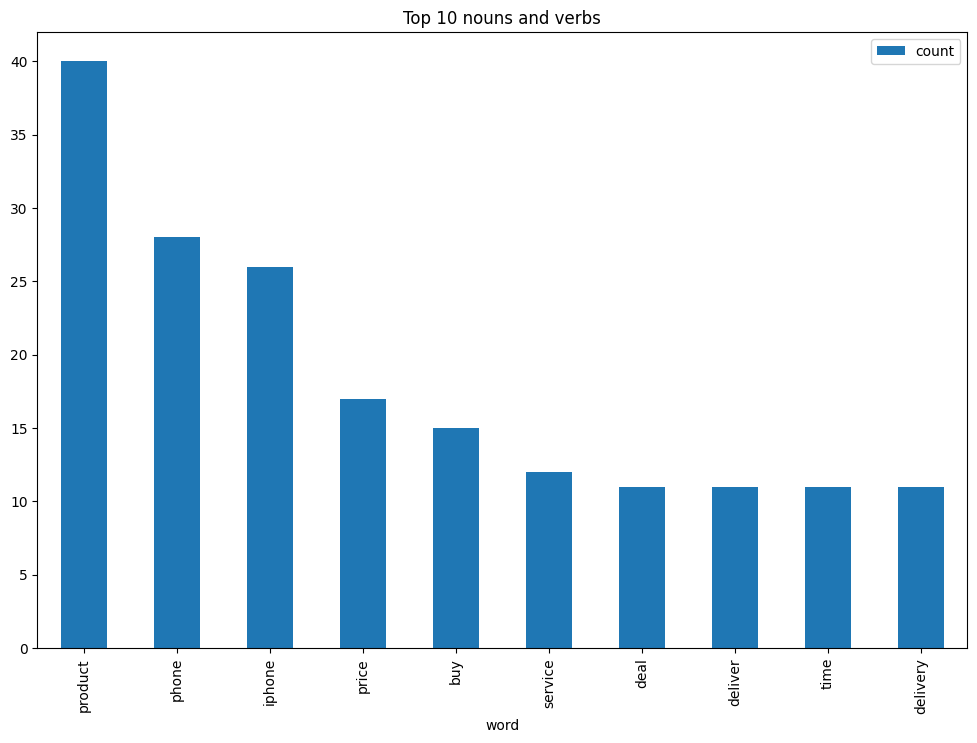

In [35]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

**Emotion Mining - Sentiment Analysis**

In [60]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

["Satisfied and will buy more products from Snapdeal It's really 100% worth to buy this product.",
 'I am fully satisfied with this product.',
 'A mush have deal it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.',
 'no lagging till today\nsuitable for your business need.',
 'lovely  fastest super Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell you this is the most best iphone you can get at this price.',
 'It was packed beatifully by the seller and same day dispatch.',
 'Pros\n1.',
 'Very Cheap prize\n2.',
 'IOS 9 upgrade.',
 '3.',
 'Very smooth\n4.',
 'Good build quality\n\nCons\n1.Plastic body\n2.',
 '8GB memory\n\nBut even plastic body looks attractive with premium and good plastuc used.',
 'Everyone should go with this phone if you have a budget of 20K Bought this for my dear wife as a surprise.',
 'Got delivered on time!',
 'Features are good....but the phone

In [61]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Satisfied and will buy more products from Snap...
1,I am fully satisfied with this product.
2,A mush have deal it is simple \nall the thing ...
3,no lagging till today\nsuitable for your busin...
4,lovely fastest super Recently purchase the ph...
...,...
121,Overall perfect Good buy at an affordable pric...
122,Worth buying from snap deal due to its competi...
123,I would defination prefer this nxt time also H...
124,"Excellent camera , crisp display ."


In [62]:
from google.colab import files
uploaded=files.upload()

Saving archive.zip to archive (1).zip


In [63]:
# Emotion Lexicon - Affin
affin=pd.read_csv('archive.zip',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [64]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [65]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [66]:
# manual testing
calculate_sentiment(text='great')

3

In [67]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      4
1      2
2      3
3     -3
4      9
      ..
121    6
122    9
123    3
124    3
125    1
Name: sentiment_value, Length: 126, dtype: int64

In [68]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      16
1       7
2      32
3       9
4      31
       ..
121    11
122    31
123    23
124     6
125    12
Name: word_count, Length: 126, dtype: int64

In [69]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
18,But those all reviews are fake and just to dam...,-6,14
46,Dere is only one problem nd dat is space... Bt...,-4,20
33,Dont buy on fraudulent schemes.,-4,5
100,Only problem is you need to pay for everything.,-3,9
3,no lagging till today\nsuitable for your busin...,-3,9
...,...,...,...
56,awesum phone.good price good product.iphone is...,12,15
63,It is as shown Really happy with the product a...,12,50
106,"Pros : Picture quality is awesome, sound with ...",12,38
35,Recommending to everyone Its an awesome phone ...,17,26


In [70]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    126.000000
mean       2.944444
std        4.087651
min       -6.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       19.000000
Name: sentiment_value, dtype: float64

In [71]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
3,no lagging till today\nsuitable for your busin...,-3,9
5,It was packed beatifully by the seller and sam...,0,11
6,Pros\n1.,0,2
7,Very Cheap prize\n2.,0,4
8,IOS 9 upgrade.,0,3
9,3.,0,1
10,Very smooth\n4.,0,3
14,Got delivered on time!,0,4
18,But those all reviews are fake and just to dam...,-6,14
19,I am truely satisfied by snapdeal's service.,0,7


In [72]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Satisfied and will buy more products from Snap...,4,16
1,I am fully satisfied with this product.,2,7
2,A mush have deal it is simple \nall the thing ...,3,32
4,lovely fastest super Recently purchase the ph...,9,31
11,Good build quality\n\nCons\n1.Plastic body\n2.,3,7
...,...,...,...
121,Overall perfect Good buy at an affordable pric...,6,11
122,Worth buying from snap deal due to its competi...,9,31
123,I would defination prefer this nxt time also H...,3,23
124,"Excellent camera , crisp display .",3,6


In [73]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Satisfied and will buy more products from Snap...,4,16,0
1,I am fully satisfied with this product.,2,7,1
2,A mush have deal it is simple \nall the thing ...,3,32,2
3,no lagging till today\nsuitable for your busin...,-3,9,3
4,lovely fastest super Recently purchase the ph...,9,31,4
...,...,...,...,...
121,Overall perfect Good buy at an affordable pric...,6,11,121
122,Worth buying from snap deal due to its competi...,9,31,122
123,I would defination prefer this nxt time also H...,3,23,123
124,"Excellent camera , crisp display .",3,6,124


<ipython-input-74-aa15d41db3a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

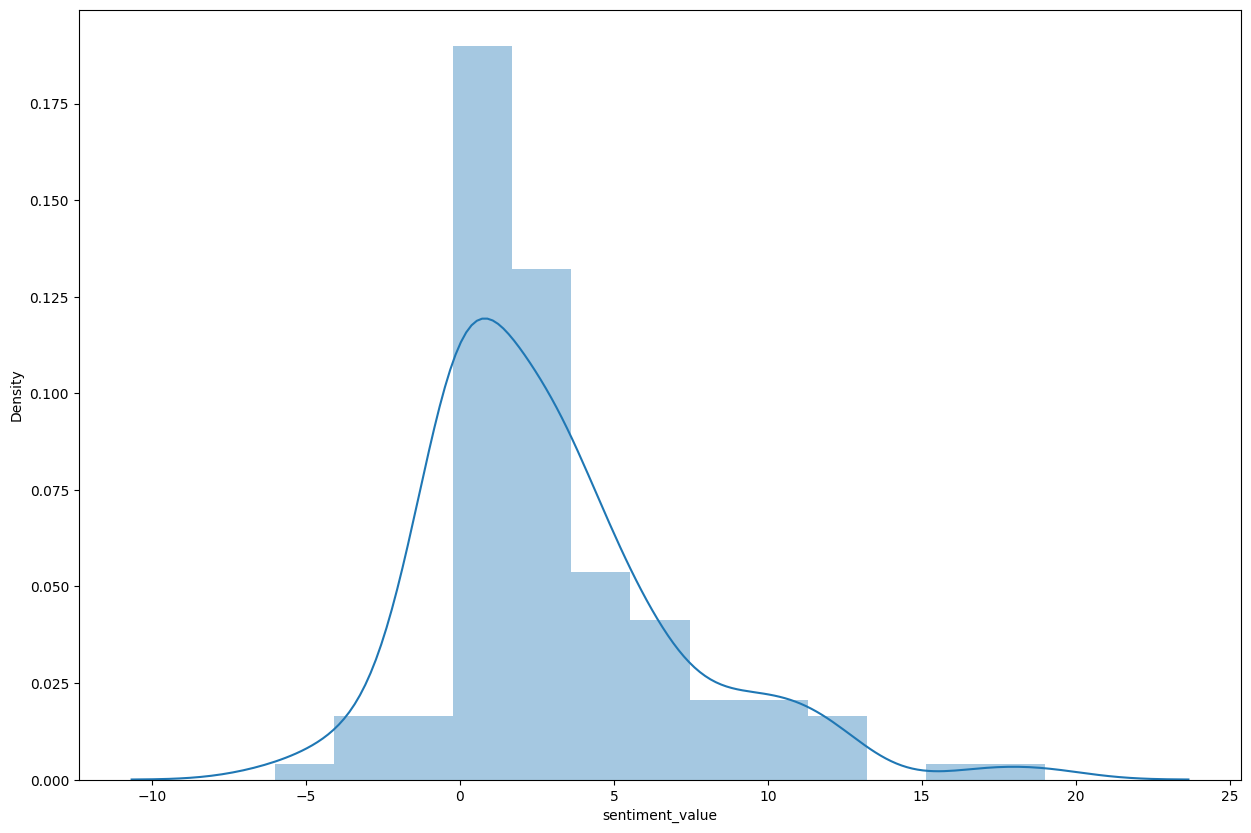

In [74]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

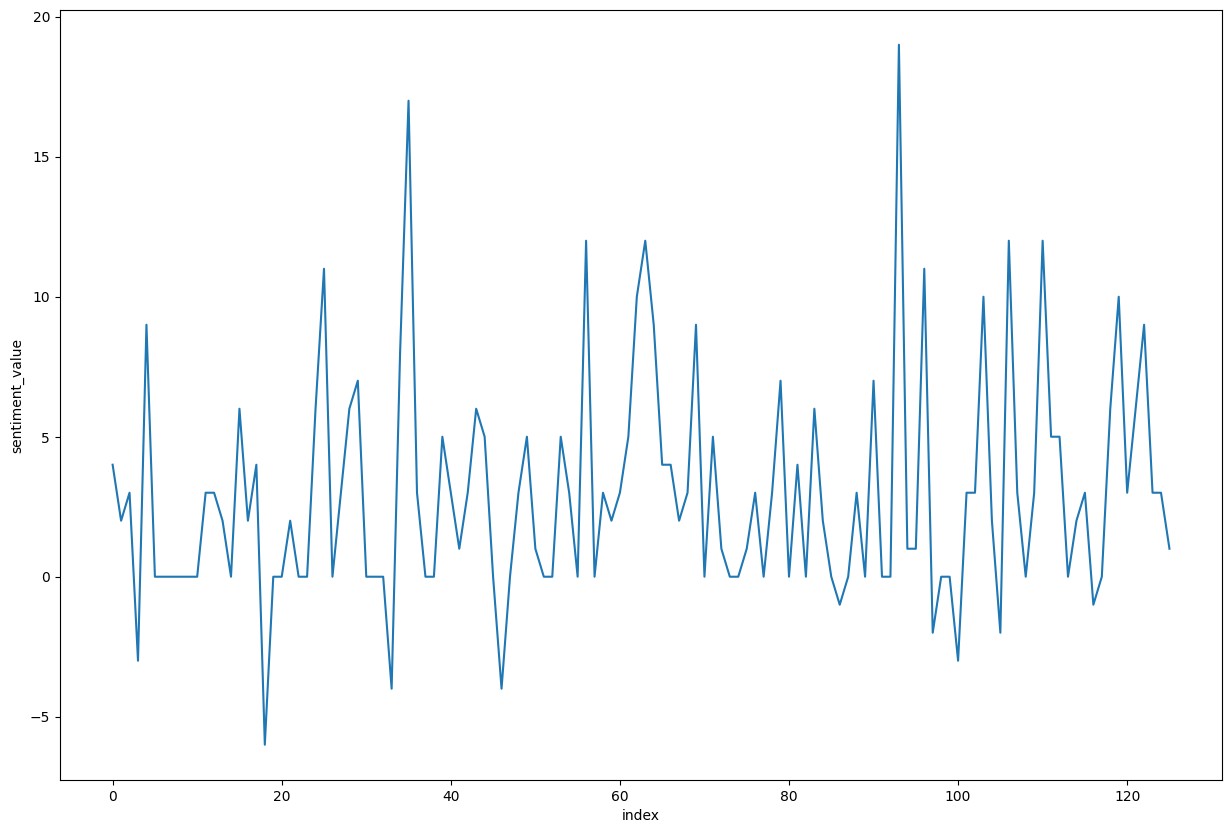

In [75]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

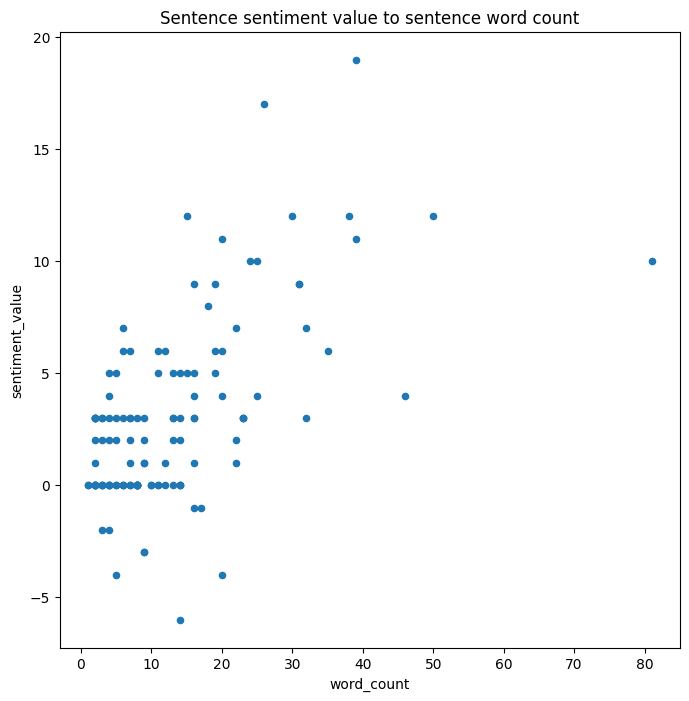

In [76]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')